<a href="https://colab.research.google.com/github/SemilleroNeuroCo/EEG-DATA/blob/master/EjClusteringySVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APRENDIZAJE NO SUPERVISADO**

**Agrupar usuarios Twitter de acuerdo a su personalidad con K-means clustering**

Archivo .csv que contiene rasgos de la personalidad de usuarios de Twitter. Hay filtrados 140 famosos del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como «Ocean: The Big Five» se tiene como características de entrada:

usuario= (el nombre en Twitter)

«op» = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte

«co» =Conscientiousness – grado de orden, prolijidad, organización

«ex» = Extraversion – grado de timidez, solitario o participación ante el grupo social

«ag» = Agreeableness – grado de empatía con los demás, temperamento

«ne» = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.

Wordcount – Cantidad promedio de palabras usadas en sus tweets

Categoria – Actividad laboral del usuario (actor, cantante, etc.)

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1.Actor/actriz 
2.Cantante 
3.Modelo 
4.Tv, series 
5.Radio 
6.Tecnología 
7.Deportes 
8.Politica 
9.Escritor 

In [ ]:
# Deben importar numpy, pandas y matplotlib
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab Notebooks

# Deben importar el archivo .csv y leer las cabeceras
#
#

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
# Cuantos por categoria?
#

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


In [ ]:
# solo trabajamos con 3 categorias
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

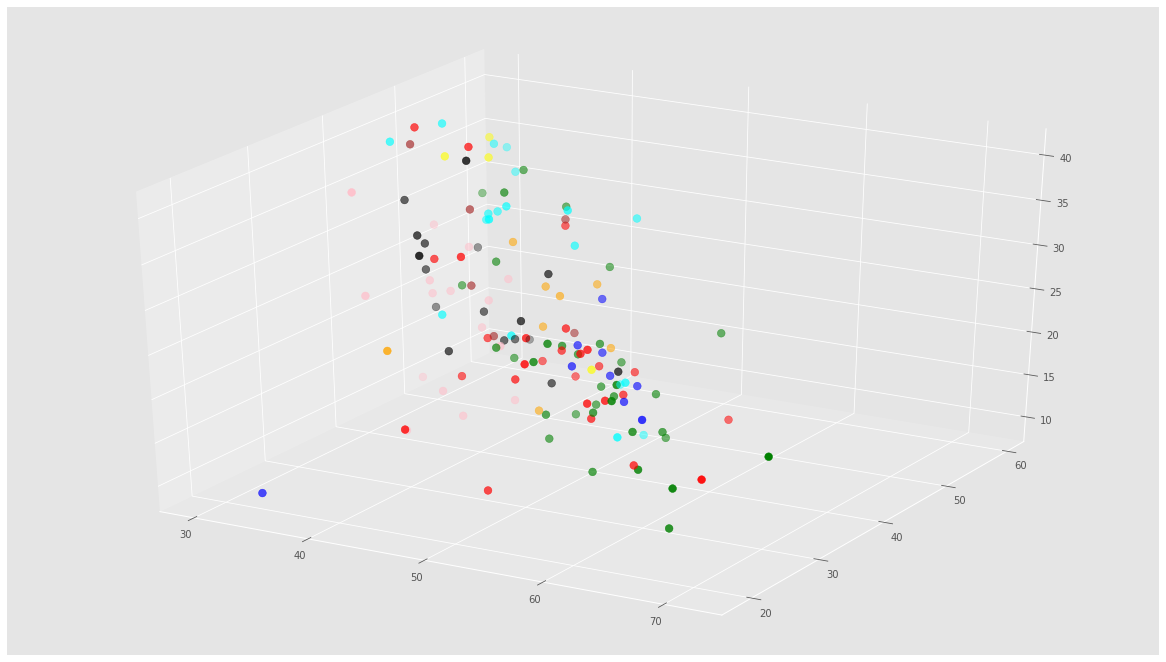

In [ ]:
# Grafica 3D representado las categorias
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

In [ ]:
# encontrar el valor de k ideal (clusters)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
# Graficar el numero de clusters vs score. titulo: Elbow curve
#
#
#
#

NameError: name 'KMeans' is not defined

In [ ]:
# Se elige k=5 y se entrena con kmeans
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[58.58657531 31.02839375 15.6120435 ]
 [35.33842993 49.22755581 33.9381323 ]
 [50.12985798 40.95002902 17.53234775]
 [42.49822271 34.19878283 19.97329642]
 [39.43540145 43.11059564 26.11571576]]


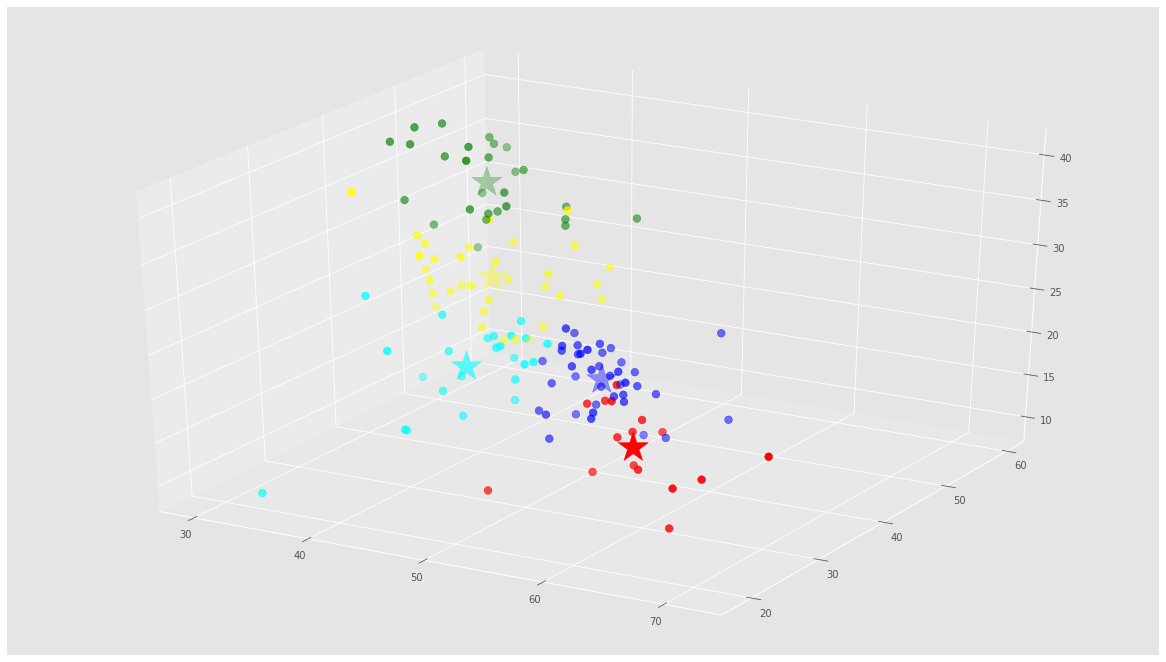

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

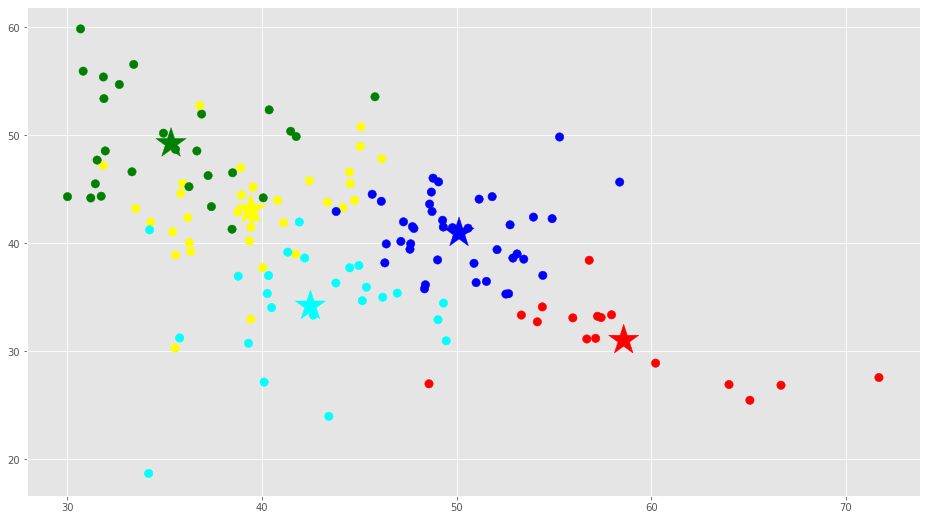

In [ ]:
# Graficas en 2D con las proyecciones a partir de nuestra gráfica 3D para visualizar mejor
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

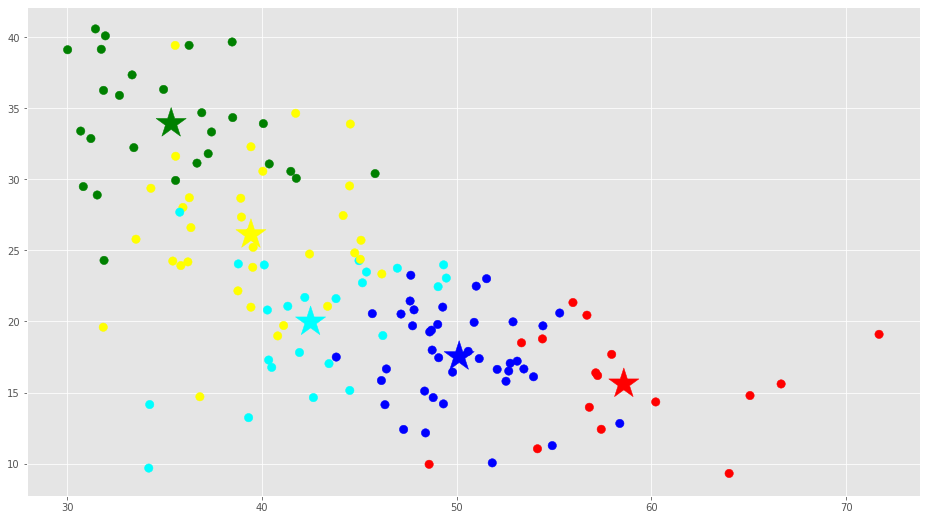

In [ ]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

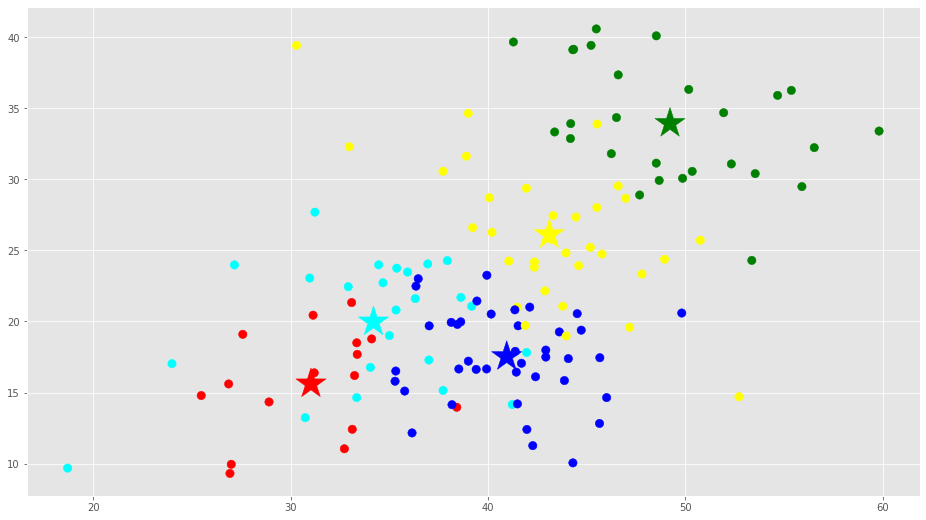

In [ ]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Numero de usuarios por cluster
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16
1,green,27
2,blue,40
3,cyan,24
4,yellow,33


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

JudgeJudy
DaniMateoAgain
carmenelectra
kobebryant
David_Busta


**Singular Value Decomposition SVD**

(545, 644)


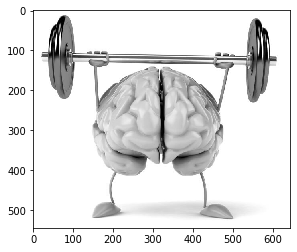

In [ ]:
# Importar librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import time
from PIL import Image # conda install pillow
# Cargar imagen, convertirla a escala de grises y volverla matriz
# 
#
#

In [ ]:
# SVD
U, sigma, V = np.linalg.svd(imgmat)

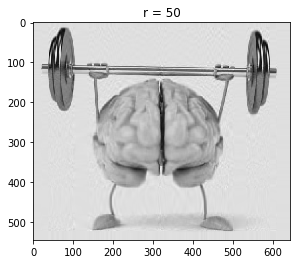

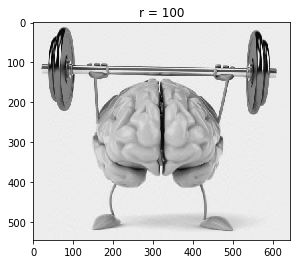

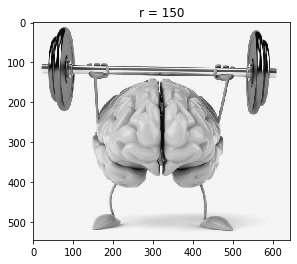

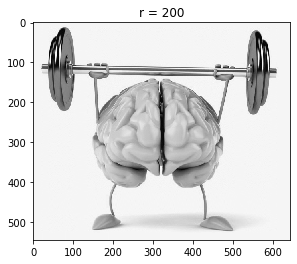

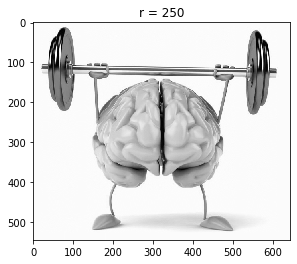

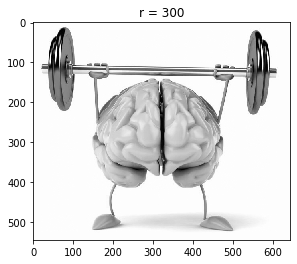

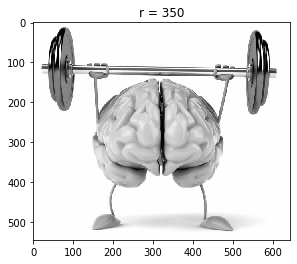

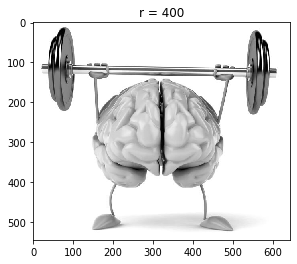

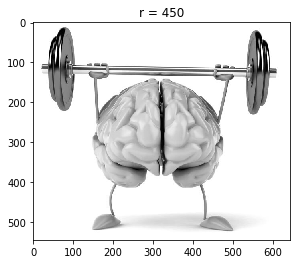

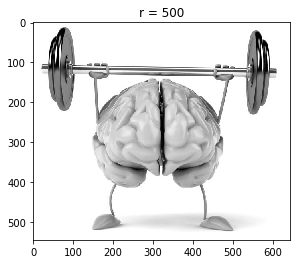

In [ ]:
# Graficar para diferentes r
for i in range(50, 546, 50):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "r = %s" % i
    plt.title(title)
    plt.show()